In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

In [2]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
df.shape

(1000, 12)

In [4]:
df[['custcat']].value_counts()

custcat
3          281
1          266
4          236
2          217
dtype: int64

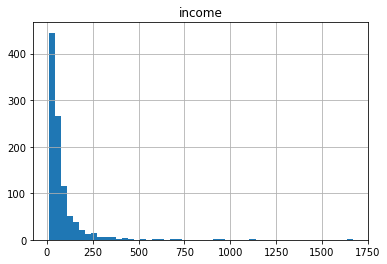

In [5]:
df[['income']].hist(bins=50);

In [6]:
x = np.asanyarray(df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']])
x[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [7]:
y = np.asanyarray(df['custcat'])
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

In [8]:
print(x[0:5])
scaler = preprocessing.StandardScaler().fit(x)
x = scaler.transform(x.astype(float))
print(x[0:5])


[[  2.  13.  44.   1.   9.  64.   4.   5.   0.   0.   2.]
 [  3.  11.  33.   1.   7. 136.   5.   5.   0.   0.   6.]
 [  3.  68.  52.   1.  24. 116.   1.  29.   0.   1.   2.]
 [  2.  33.  33.   0.  12.  33.   2.   0.   0.   1.   1.]
 [  2.  23.  30.   1.   9.  30.   1.   2.   0.   0.   4.]]
[[-0.02696767 -1.055125    0.18450456  1.0100505  -0.25303431 -0.12650641
   1.0877526  -0.5941226  -0.22207644 -1.03459817 -0.23065004]
 [ 1.19883553 -1.14880563 -0.69181243  1.0100505  -0.4514148   0.54644972
   1.9062271  -0.5941226  -0.22207644 -1.03459817  2.55666158]
 [ 1.19883553  1.52109247  0.82182601  1.0100505   1.23481934  0.35951747
  -1.36767088  1.78752803 -0.22207644  0.96655883 -0.23065004]
 [-0.02696767 -0.11831864 -0.69181243 -0.9900495   0.04453642 -0.41625141
  -0.54919639 -1.09029981 -0.22207644  0.96655883 -0.92747794]
 [-0.02696767 -0.58672182 -0.93080797  1.0100505  -0.25303431 -0.44429125
  -1.36767088 -0.89182893 -0.22207644 -1.03459817  1.16300577]]


In [9]:
# Standardization of datasets 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
print(f'x_train shape = {x_train.shape}\nx_test shape = {x_test.shape}\ny_train = {y_train.shape}\ny_test = {y_test.shape}')

x_train shape = (800, 11)
x_test shape = (200, 11)
y_train = (800,)
y_test = (200,)


In [10]:
from sklearn.neighbors import KNeighborsClassifier 

# Training

In [11]:
k = 4
knn_model = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)
knn_model

KNeighborsClassifier(n_neighbors=4)

In [12]:
y_hat = knn_model.predict(x_test)
print(f'y_hat = {y_hat[0:5]}\ny_test = {y_test[0:5]}')

y_hat = [1 1 3 2 4]
y_test = [4 1 1 2 4]


# Accuracy Evaluation

In [13]:
from sklearn import metrics
print('train set accuracy = ',metrics.accuracy_score(knn_model.predict(x_train), y_train))
print('test set accuracy = ',metrics.accuracy_score(knn_model.predict(x_test), y_test))

train set accuracy =  0.5475
test set accuracy =  0.32


In [34]:
ks = np.zeros((1, 10))
test_acc = np.zeros((1, 10))
for i in range(1, 11):
    knn_model = KNeighborsClassifier(n_neighbors = i).fit(x_train, y_train)
    yhat = knn_model.predict(x_test)
    train_set_accuracy = metrics.accuracy_score(knn_model.predict(x_train), y_train)
    test_set_accuracy  = metrics.accuracy_score(knn_model.predict(x_test), y_test)
    print(f'______________k = {i}_______________________________________________')
    print(f'train set accuracy = {train_set_accuracy}')
    print(f'test set accuracy  = {test_set_accuracy}')
    ks[0, i - 1] = i
    test_acc[0, i - 1] = test_set_accuracy
    

______________k = 1_______________________________________________
train set accuracy = 1.0
test set accuracy  = 0.3
______________k = 2_______________________________________________
train set accuracy = 0.6175
test set accuracy  = 0.29
______________k = 3_______________________________________________
train set accuracy = 0.56875
test set accuracy  = 0.315
______________k = 4_______________________________________________
train set accuracy = 0.5475
test set accuracy  = 0.32
______________k = 5_______________________________________________
train set accuracy = 0.5375
test set accuracy  = 0.315
______________k = 6_______________________________________________
train set accuracy = 0.51625
test set accuracy  = 0.31
______________k = 7_______________________________________________
train set accuracy = 0.5125
test set accuracy  = 0.335
______________k = 8_______________________________________________
train set accuracy = 0.4925
test set accuracy  = 0.325
______________k = 9___________

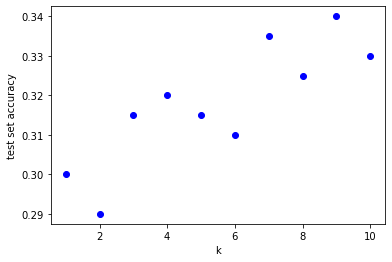

In [38]:
plt.scatter(ks, test_acc, c = 'b', )
plt.xlabel('k')
plt.ylabel('test set accuracy')
plt.show()